In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import pairwise_distances
sns.set(style="whitegrid")

In [21]:
import DataProvider
import Visualizer
from Clusterer import Clusterer

In [22]:
hamburg="test-data/27_teams_017662e4.json"
mainz_alt="test-data/36_teams_5a005256.json"
mainz_complete="test-data/45_teams_b17d628f.json"
rostock="test-data/21_teams_274fc6d7.json"

data = DataProvider.DataProvider(hamburg)
dist_matrix = data.get_distance_matrix()
clusterer = Clusterer(data)

dist_percentiles = data.get_distance_percentiles()
print(dist_percentiles)

{50: np.float64(4209.4469018843865), 70: np.float64(6428.334001638435), 75: np.float64(7024.032049357544), 80: np.float64(7412.448055268681), 90: np.float64(9279.532467605568), 95: np.float64(10527.74727331306), 99: np.float64(12186.413525534115)}


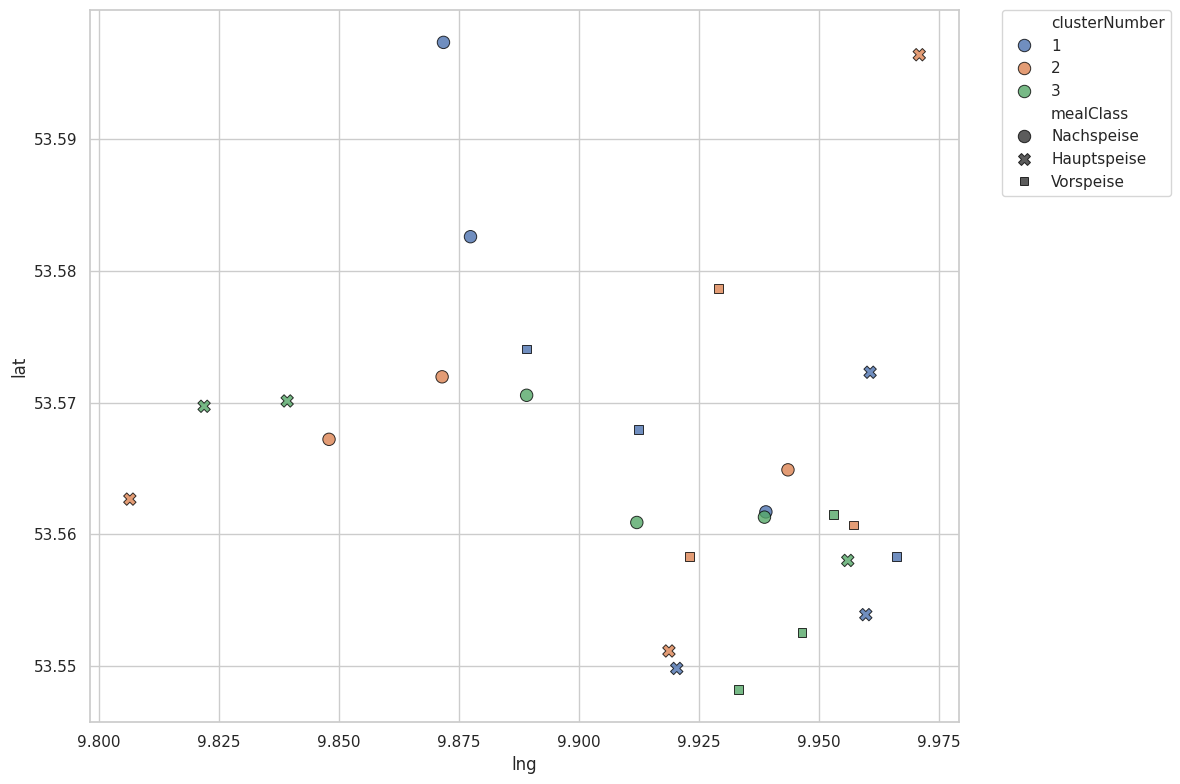

Cluster 1: 9 Elemente, maximale Distanz: 9278.73
Cluster 2: 9 Elemente, maximale Distanz: 13614.43
Cluster 3: 9 Elemente, maximale Distanz: 10930.90


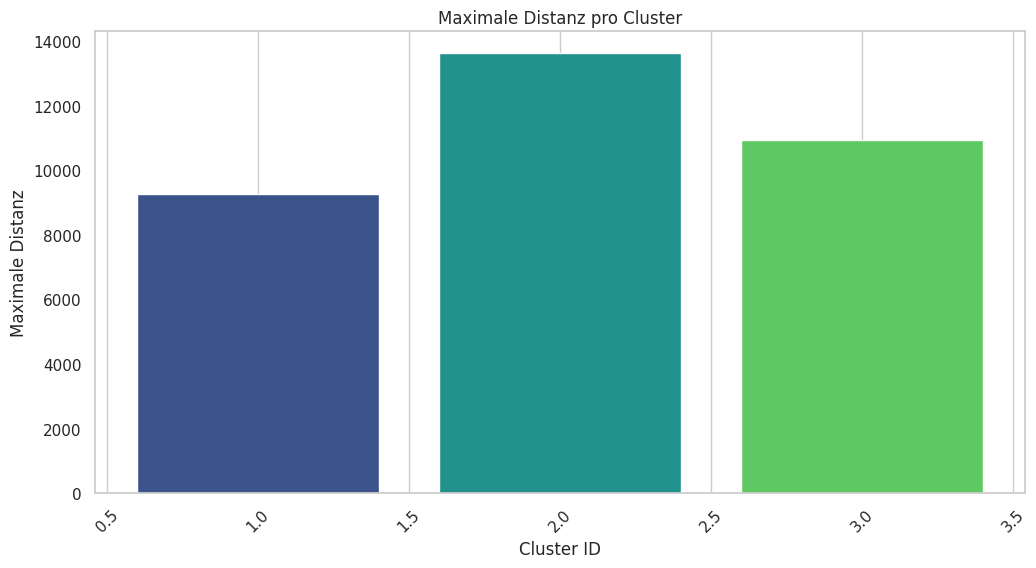

In [24]:
vis = Visualizer.Visualizer(data)
vis.plot_geocodes(data.get_routes())
vis.plot_max_distances_per_cluster(clusterer.print_max_distances_per_cluster())

In [25]:
routes, labels = clusterer.predict()
print (labels)


Cluster 0:
Current meal classes: Counter({'Nachspeise': 5, 'Hauptspeise': 3, 'Vorspeise': 1})
Required meal classes: Counter({'Vorspeise': 3, 'Hauptspeise': 3, 'Nachspeise': 3})
Cluster 0: Nachspeise excess: 2
Removing indices [1, 23] from cluster 0

Cluster 1:
Current meal classes: Counter({'Vorspeise': 8, 'Hauptspeise': 5, 'Nachspeise': 4})
Required meal classes: Counter({'Vorspeise': 3, 'Hauptspeise': 3, 'Nachspeise': 3})
Cluster 1: Hauptspeise excess: 2
Removing indices [2, 3] from cluster 1
Cluster 1: Nachspeise excess: 1
Removing indices [25] from cluster 1
Cluster 1: Vorspeise excess: 5
Removing indices [13, 15, 17, 18, 21] from cluster 1

Cluster 2:
Current meal classes: Counter({'Hauptspeise': 1})
Required meal classes: Counter({'Vorspeise': 3, 'Hauptspeise': 3, 'Nachspeise': 3})

*** AFTER EXCEESS REMOVAL ***

*** Current cluster status:***
Available indices: {1, 2, 3, 13, 15, 17, 18, 21, 23, 25}
Cluster 0:
Indices: [4, 5, 7, 8, 9, 20, 26]
Meal Class Counts: Counter({'Nachsp

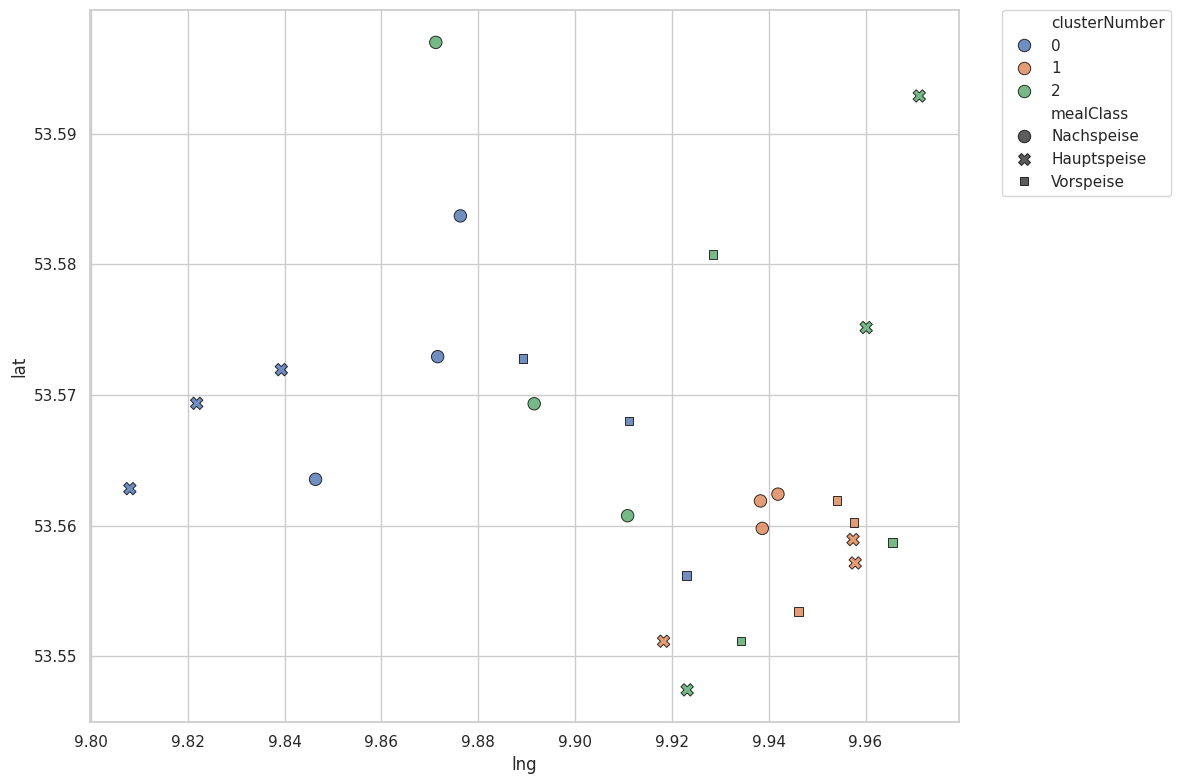

Cluster 0: 9 Elemente, maximale Distanz: 9146.17
Cluster 1: 9 Elemente, maximale Distanz: 3248.88
Cluster 2: 9 Elemente, maximale Distanz: 9278.73


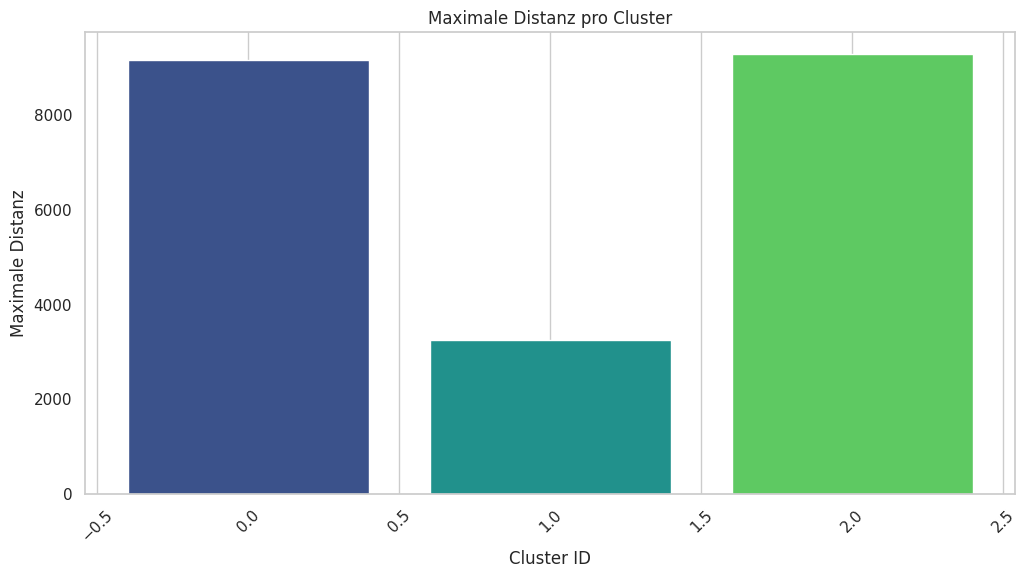

In [26]:
vis.plot_geocodes(routes)
vis.plot_max_distances_per_cluster(clusterer.print_max_distances_per_cluster())

In [27]:
route_cluster_0 = [route for route in routes if route.clusterNumber == 0] 
route_cluster_0

[Team(5, Nachspeise (--> Team(16, Vorspeise), Team(3, Hauptspeise))),
 Team(6, Nachspeise (--> Team(19, Vorspeise), Team(15, Hauptspeise))),
 Team(8, Hauptspeise (--> Team(20, Vorspeise), Team(6, Nachspeise))),
 Team(9, Vorspeise (--> Team(7, Hauptspeise), Team(5, Nachspeise))),
 Team(10, Nachspeise (--> Team(19, Vorspeise), Team(11, Hauptspeise))),
 Team(14, Vorspeise (--> Team(3, Hauptspeise), Team(1, Nachspeise))),
 Team(18, Vorspeise (--> Team(8, Hauptspeise), Team(10, Nachspeise))),
 Team(21, Hauptspeise (--> Team(22, Vorspeise), Team(13, Nachspeise))),
 Team(27, Hauptspeise (--> Team(23, Vorspeise), Team(24, Nachspeise)))]

In [34]:
import RouteBuilder
route_builder = RouteBuilder.RouteBuilder(data, routes)
routes_cluster_0 = route_builder.build_route_for_cluster_label(0)

Building route for cluster label 0 with size 9 and matrix: [[[1, 4, 5], [2, 6, 8], [3, 7, 9]], [[4, 2, 9], [5, 7, 8], [6, 1, 3]], [[7, 1, 2], [8, 3, 4], [9, 5, 6]]]
Testing 3 x [(Team(8, Hauptspeise), Team(21, Hauptspeise), Team(27, Hauptspeise)), (Team(8, Hauptspeise), Team(27, Hauptspeise), Team(21, Hauptspeise)), (Team(21, Hauptspeise), Team(8, Hauptspeise), Team(27, Hauptspeise)), (Team(21, Hauptspeise), Team(27, Hauptspeise), Team(8, Hauptspeise)), (Team(27, Hauptspeise), Team(8, Hauptspeise), Team(21, Hauptspeise)), (Team(27, Hauptspeise), Team(21, Hauptspeise), Team(8, Hauptspeise))] meal class permutations
Testing permutation combo: ((Team(9, Vorspeise), Team(14, Vorspeise), Team(18, Vorspeise)), (Team(8, Hauptspeise), Team(21, Hauptspeise), Team(27, Hauptspeise)), (Team(5, Nachspeise), Team(6, Nachspeise), Team(10, Nachspeise)))
Total distance for current assignment: 85296.87673503172
Testing permutation combo: ((Team(9, Vorspeise), Team(14, Vorspeise), Team(18, Vorspeise)), (

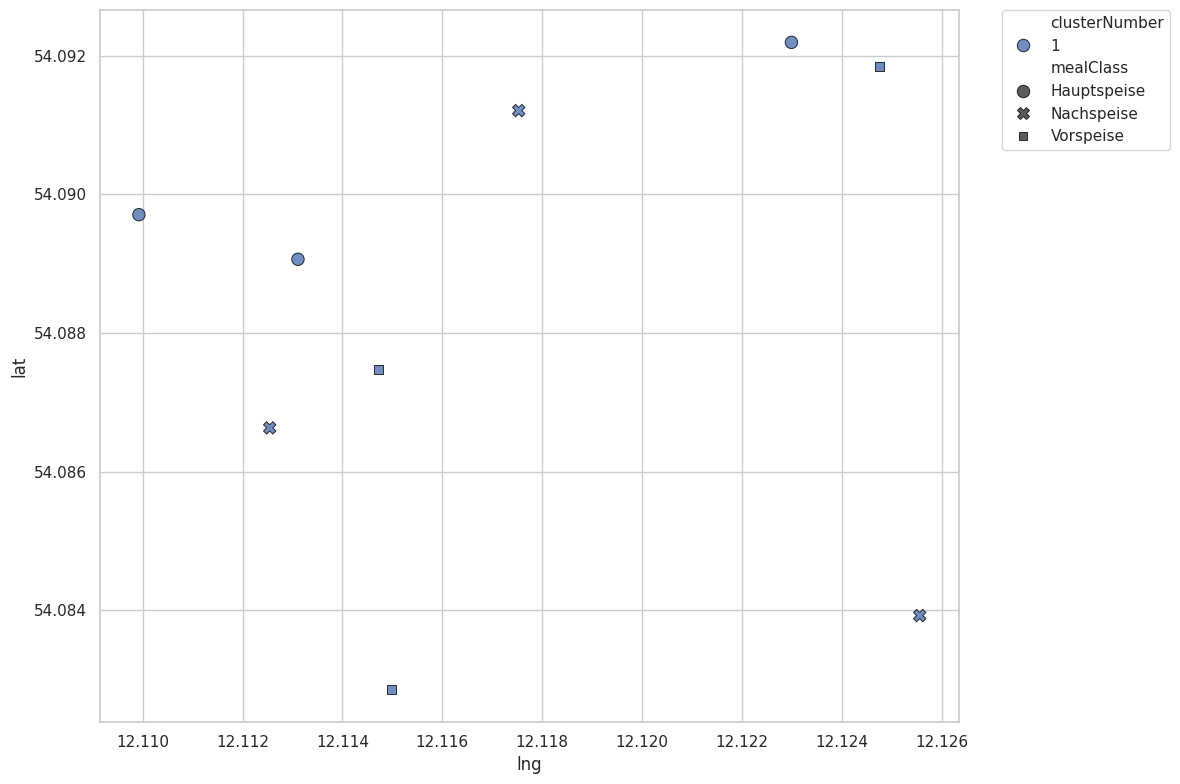

In [16]:
vis.plot_geocodes(route_cluster_0)